In [2]:
from glob import glob
import numpy as np

In [3]:
from lightkurve import KeplerTargetPixelFile
from astropy.coordinates import SkyCoord

In [3]:
#fnames = np.sort(glob('data/*.fits'))
#tpf = KeplerTargetPixelFile.from_fits_images(images=fnames,
  #                                           position=SkyCoord(257.13700, 24.48958, unit='deg'),
  ##                                           size=(9,9),
         #                                    target_id='MyCutOut')

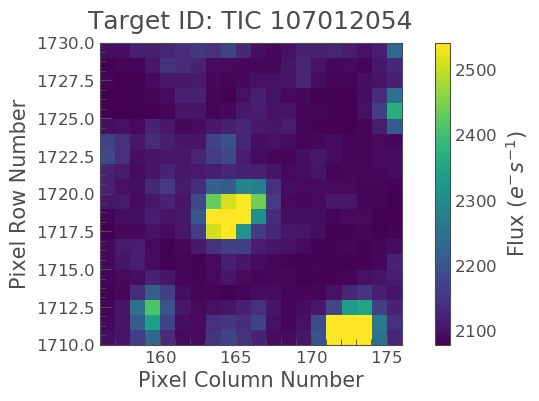

In [4]:
import lightkurve as lk

tpf = lk.search_tesscut('TIC 107012054', sector=10).download(cutout_size=20)

tpf
tpf.plot()

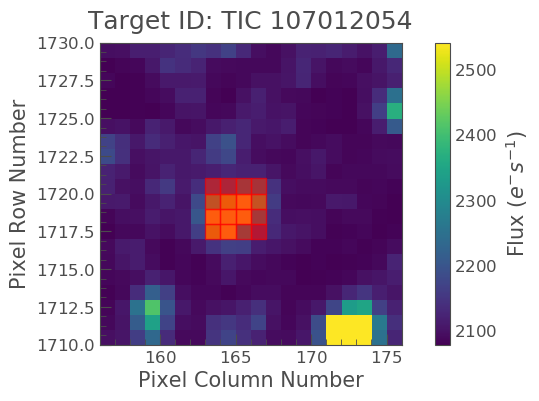

In [5]:
import numpy as np
aper = np.zeros(tpf.shape[1:], dtype=np.int)
aper[7:11, 7:11] = 1
tpf.plot(aperture_mask=aper, mask_color='red');

(0.99, 1.01)

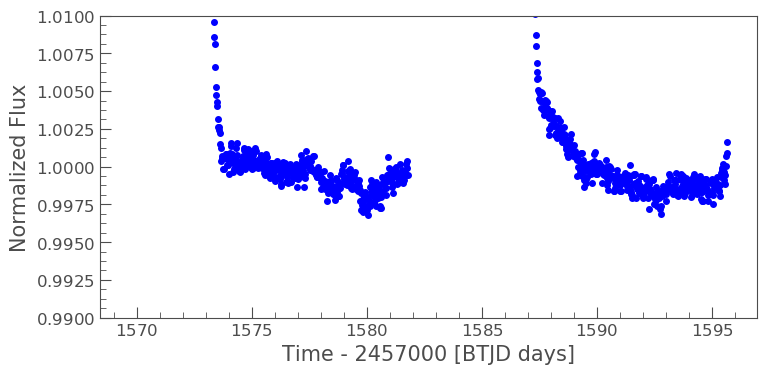

In [6]:
import matplotlib.pyplot as plt

# Build the NEW aperture, and the light curve
user_lc = tpf.to_lightcurve(aperture_mask=aper.astype(bool))
# Clean the light curve
user_lc = user_lc.remove_nans().remove_outliers()
user_lc.plot(marker='o',linestyle='None',markersize=4,color='blue')
plt.ylim(0.99,1.01)


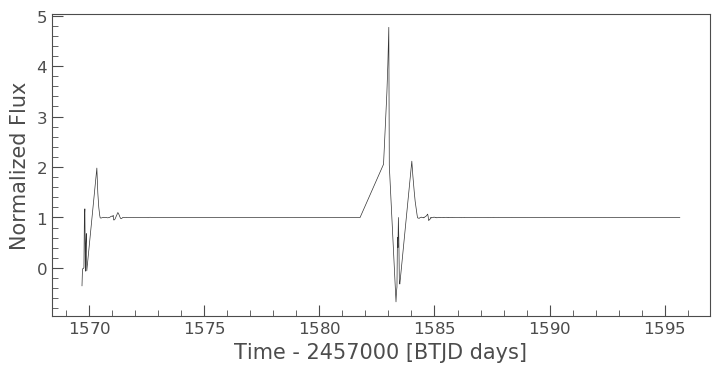

In [7]:
corrector = lk.correctors.SFFCorrector(user_lc)
new_lc_sff = corrector.correct(user_lc.centroid_col,user_lc.centroid_row)

new_lc_sff.plot()

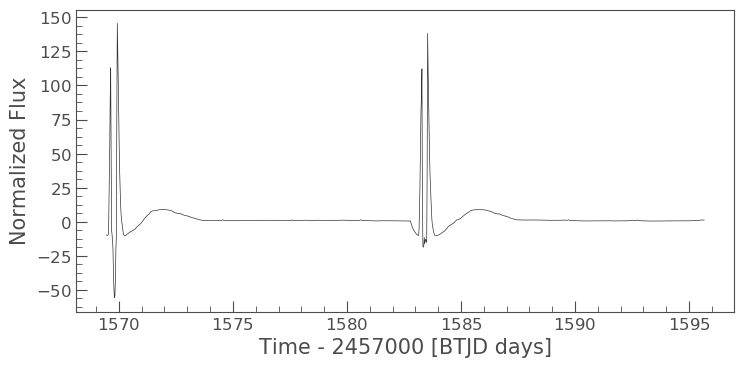

In [8]:
corrector = lk.PLDCorrector(tpf) # doctest: +SKIP
new_lc_pld = corrector.correct() # doctest: +SKIP

new_lc_pld.plot()

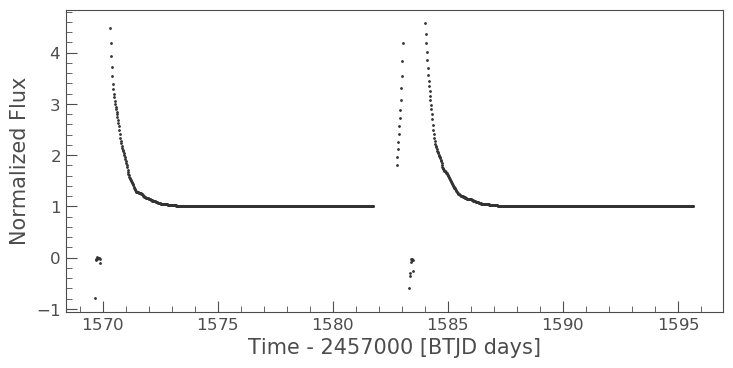

In [9]:
user_lc.scatter()

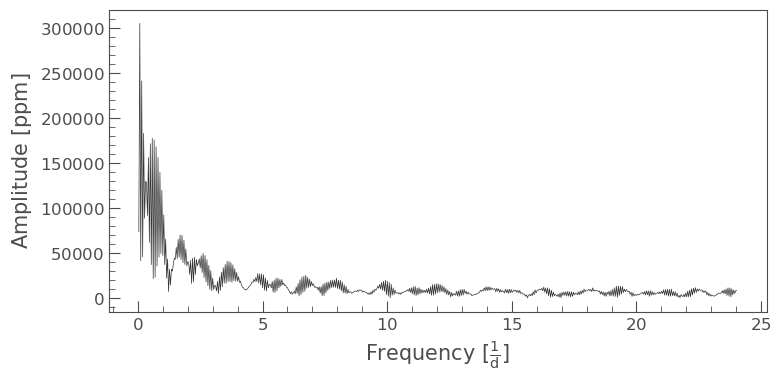

In [10]:
pg = user_lc.to_periodogram(oversample_factor=1)
pg.plot()

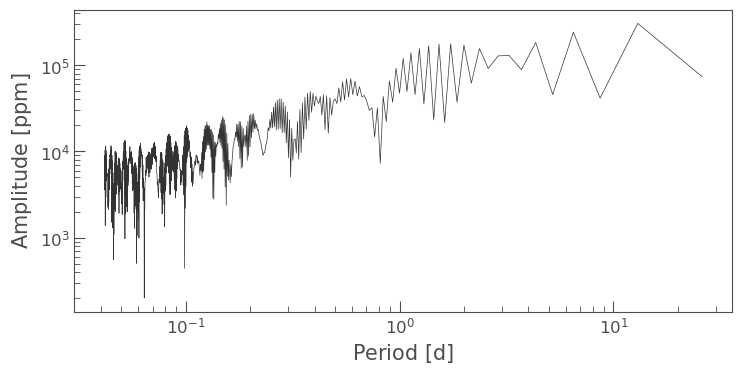

In [11]:
pg.plot(view='period', scale='log')

Best period: 12.989440917968748 d


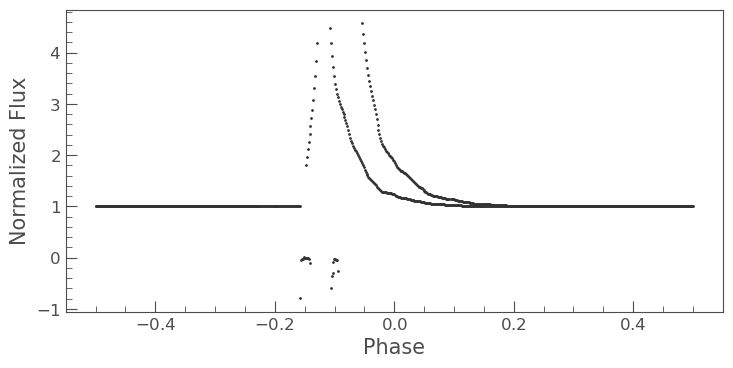

In [12]:
period = pg.period_at_max_power
print('Best period: {}'.format(period))
user_lc.fold(period.value).scatter();

Best period: 51.95776367187499 d


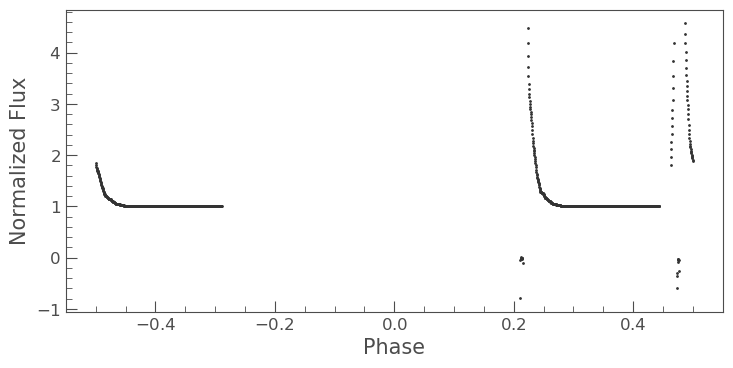

In [13]:
period = pg.period_at_max_power * 4
print('Best period: {}'.format(period))
user_lc.fold(period.value).scatter();

In [14]:
import astropy.units as u
pg = user_lc.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)

Best period: 1.1369777363519198 d


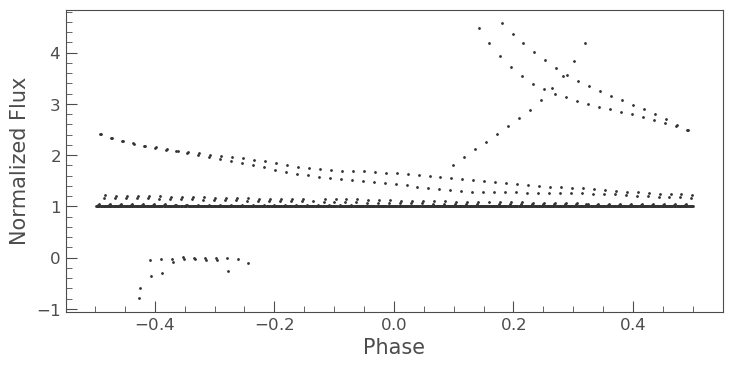

In [15]:
period = pg.period_at_max_power
print('Best period: {}'.format(period))
user_lc.fold(period.value).scatter();